In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
N = 300
D = 2
K = 3

In [9]:
X = np.zeros([N, D])
X[:100, :] = np.random.randn(100, D) + np.array([0, 0])
X[100:200, :] = np.random.randn(100, D) + np.array([5, 5])
X[200:300, :] = np.random.randn(100, D) + np.array([0, 5])

In [10]:
# choose clusters centers randomly:
clusters_centers = np.zeros((K, D))
for k in range(K):
    i = np.random.choice(N)
    clusters_centers[k] = X[i]
clusters_centers


array([[ 5.59016076,  4.15417764],
       [-0.01394337,  5.76288777],
       [ 4.6387609 ,  4.3362957 ]])

In [11]:
# k-means loop:
max_iter = 20
clusters_identities = np.zeros(N)
list_clusters_identities = []
min_dists = np.zeros(N)
cost = []

for i in range(max_iter):
    old_clusters_identities = clusters_identities.copy()
    list_clusters_identities.append(old_clusters_identities)

    for n in range(N):
        closest_k = -1
        min_dist = float('inf')
        for k in range(K):
            d = (X[n] - clusters_centers[k]).dot(X[n] - clusters_centers[k])
            if d < min_dist:
                min_dist = d
                closest_k = k
        clusters_identities[n] = closest_k
        min_dists[n] = min_dist
    
    # store the cost:
    cost.append(min_dists.sum())
    
    for k in range(K):
        clusters_centers[k, :] = X[clusters_identities==k].mean(axis=0)
    
    if np.all(old_clusters_identities == clusters_identities):
        print(f"Converged at step {i}")
        break

Converged at step 7


Text(0.5, 0, 'Iteration')

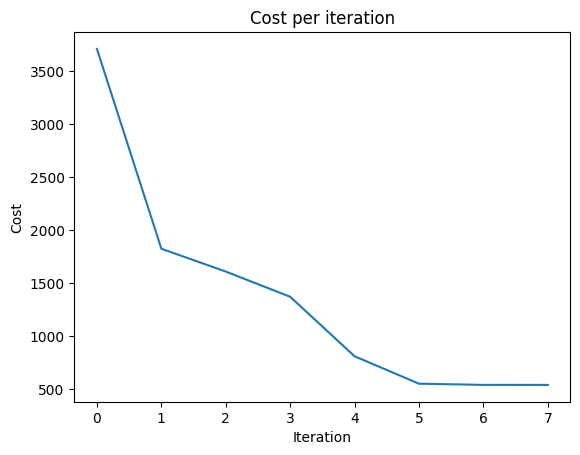

In [12]:
plt.plot(cost)
plt.title("Cost per iteration")
plt.ylabel("Cost")
plt.xlabel("Iteration")